<a href="https://colab.research.google.com/github/santiagorc99/Intro_optimizacion-/blob/main/Trabajo3_Optimizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Santiago Rincón Carreño - 816052

# **Introducción a la Optimización - Tercer Trabajo**
## **Método de Newton**
Es un método utilizado para encontrar un optimizador de una función polinómica de clase $C^m$. Gracias a la serie de Taylor, se puede representar cualquier función $p_m(\mathbf{x})$ (Con $\mathbf{x} \in R^n $ como vector de variables independientes) en torno al punto $\mathbf{a}$ de la siguiente forma:

##### **Aproximación de grado 1**:
$$p_1 = f(\mathbf{a}) + {\nabla f(\mathbf{a})}^{T}(\mathbf{x}-\mathbf{a})$$
##### **Aproximación de grado 2**:
$$p_2 = f(\mathbf{a}) + {\nabla f(\mathbf{a})}^{T}(\mathbf{x}-\mathbf{a})+\frac{1}{2}(\mathbf{x}-\mathbf{a})^T\mathbf{F}(\mathbf{a})(\mathbf{x}-\mathbf{a})$$

Donde $\nabla f(\mathbf{x})$ corresponde al gradiente de $f$ y $\mathbf{F}(\mathbf{x})$ corresponde al Hessiano del $f$.

Se puede llegar a una solución iterativa para llegar a un optimizador de dicho polinomio de la siguiente manera:
$$\mathbf{x}_{k+1} = \mathbf{x}_{k}-\mathbf{H}(\mathbf{x}_k)\mathbf{g}(\mathbf{x}_k)\,\,\,\,\,\,\,\,\,\, (1)$$
Donde $\mathbf{H}(\mathbf{x}_k)={\mathbf{F}(\mathbf{x}_k)}^{-1}$ y $\mathbf{g}(\mathbf{x}_k)=\nabla f(\mathbf{x}_k)$.

#### **Método de Newton para Funciones Cuadráticas**
Si se tiene una función cuadrática de la siguiente forma:
$$f(\mathbf{x}) = \mathbf{x}^T\mathbf{A}\mathbf{x}-\mathbf{x}^T\mathbf{b}$$
Donde $\mathbf{x} \in R^{(n,1)}$, $\mathbf{A} \in R^{(n,n)}$ es una matriz no simétrica y $\mathbf{b} \in R^{(n,1)}$. Se puede hallar una matriz $\mathbf{Q}$ simétrica que satisfaga la anterior ecuación, por lo que el problema puede ser reescrito como:
$$f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^T\mathbf{Q}\mathbf{x}-\mathbf{x}^T\mathbf{b}$$
Con $\mathbf{Q}={\mathbf{Q}}^T, \mathbf{Q} \in R^{(n,n)}>0$. Si se calcula el gradiente y el Hessiano se obtiene:
$$\mathbf{F}(\mathbf{x})=\mathbf{Q}$$
$$\nabla f(\mathbf{x})=\mathbf{Q}\mathbf{x}-\mathbf{b}$$
Si se reemplazan dichos valores en $(1)$ para k=0, se obtiene que:
$$\mathbf{x}_{1}=\mathbf{x}_0-{\mathbf{F}(\mathbf{x}_0)}^{-1}\nabla f(\mathbf{x}_0)$$
$$\mathbf{x}_{1} = \mathbf{Q}^{-1}\mathbf{b}$$
Y de esta forma, en la primera iteración se llega al valor óptimo, se puede ver igualmente cuando se hace que $f(\mathbf{x})=0$.

Este método se restrige a que $\mathbf{F}(\mathbf{x})>0$, por ello se puede añadir un término de regularización que fuerce al cumplimiento de $\mathbf{F}(\mathbf{x})>0$. La ecuación queda de la forma:
$$\mathbf{x}_{k+1}=\mathbf{x}_{k}-{(\mathbf{F}(\mathbf{x}_k)+\mu_k\mathbf{I})}^{-1}\nabla f(\mathbf{x}_k)$$
Donde $I$ es la matriz identidad de tamaño $(n,n)$ y $\mu_k$ es el factor de penalización.

En este punto, la solución ya no converge en un solo paso, por lo que se puede añadir un término $\alpha_k$ llamado *speed rate* que cambia la velocidad de convergencia del algoritmo. Reescribiendo el método se tiene que:
$$\mathbf{x}_{k+1}=\mathbf{x}_{k}-\alpha_k{(\mathbf{F}(\mathbf{x}_k)+\mu_k\mathbf{I})}^{-1}\nabla f(\mathbf{x}_k)$$
$\alpha_k$ es el optimizador de algún $\phi(\alpha_k)$.Bajo cualquier caso, el parámetro debe ser cercano a cero, porque puede haber divergencia en el algoritmo, es decir, que la solución final no lleve a un valor real.


## **Método Cuasi-Newton**
Dada la dificultad de, en muchos casos, encontrar el Hessiano de una función puede convertirse en un problema no trivial y costoso (Computacionalmente hablando), por eso se propone una aproximación al Hessiano. Básicamente, cualquier método que aproxime el Hessiano en cada iteración y siga la estructura del método original de Newton y sus variantes, se dice un método Cuasi-Newton.

Como se dijo anteriormente, el Hessiano no se calcula exactamente, sino que se hace actualiza con base en unos vectores gradiente. La aproximación se va a denotar por $\mathbf{B}$ y no necesita ser invertida analíticamente, ya que solo se genera un estimado de su inversa. 

Luego, se tiene que:
$$\mathbf{x}_{k+1} = \mathbf{x}_k + \Delta \mathbf{x}_k$$
Donde $\Delta \mathbf{x}_k= -\alpha_k\mathbf{B}^{-1}_k\nabla f(\mathbf{x}_k)$. Se define un $\Delta \nabla f(\mathbf{x}_k) = \nabla f(\mathbf{x}_{k+1})-\nabla f(\mathbf{x}_k)$.

#### **Algoritmo de Davidon-Flectcher-Powell (DFP)**
Es un método Cuasi-Newton que permite hallar el estimado del Hessiano de la siguiente forma:

###### **Paso 1**  
Escoger un punto inicial $\mathbf{x}_0$ y una matriz real positiva y simétrica $\mathbf{H}_0$.

###### **Paso 2**
Calcular $\mathbf{g}_k=\nabla f(\mathbf{x}_k)$, si $\mathbf{g}_k < \epsilon$ se tiene un punto óptimo, de lo contrario calcular un $\mathbf{d}_k=-\mathbf{H}_k\mathbf{g}_k$

###### **Paso 3**
Calcular: 
* $\mathbf{x}_{k+1}=\mathbf{x}_k+\alpha_k\mathbf{d}_k$
* $\alpha_k = \min _{ \alpha\ge0 }{f(\mathbf{x}_{k+1})} $

###### **Paso 4**
Calcular la estimación del Hessiano:
* $$\Delta\mathbf{x}_k = \alpha_k\mathbf{d}_k$$
* $$\Delta\mathbf{g}_k = \mathbf{g}_{k+1} - \mathbf{g}_k$$
* $$\mathbf{H}_{k+1} = \mathbf{H}_k + \frac{\Delta\mathbf{x}_k\Delta\mathbf{x}_k^T}{\Delta\mathbf{x}_k^T\Delta\mathbf{g}_k}-\frac{(\mathbf{H}_k\Delta\mathbf{g}_k)(\mathbf{H}_k\Delta\mathbf{g}_k)^T}{\Delta\mathbf{g}^T\mathbf{H}_k\Delta\mathbf{g}_k}$$

###### **Paso 5**
Iterar desde el paso 2 hasta encontrar una solución.



#### **Ejemplo**
En el libro de referencia, se propone:
$$ f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^T \begin{bmatrix} 4 & 2 \\ 2 & 2 \end{bmatrix} \mathbf{x}-\mathbf{x}^T \begin{bmatrix} -1 \\ 1 \end{bmatrix}$$.

##### **Solución**
Se tiene que:
* $\mathbf{g}_k = \begin{bmatrix} 4 & 2 \\ 2 & 2 \end{bmatrix}\mathbf{x}_k - \begin{bmatrix} -1 \\ 1 \end{bmatrix}$ porque $f$ es cuadrática.
* Al resolver el $\alpha_k=\min_{\alpha\ge0}{f(\mathbf{x}_{k+1})}$ se llega a que $\alpha_k = -\frac{\mathbf{g}_k^T\mathbf{d}_k}{\mathbf{d}_k^T\mathbf{Q}\mathbf{d}_k}$

En el ejercicio se proponen los siguientes valores iniciales:
* $\mathbf{x}_0 = [0,0]^T$
* $\mathbf{H}_0 = \mathbf{I}_2 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

Se procede a programar el algoritmo para este caso en particular.

Primero, se programan funciones sencillas para calcular cada paso del algoritmo.

In [68]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def calculate_g_k(x_k, Q, b):
    g_k = (Q @ x_k) - b
    return g_k

def is_not_an_optimal_point(g_k, tol):
    return (np.linalg.norm(g_k) > tol)

def calculate_d_k(H_k, g_k):
    return -(H_k @ g_k)

def calculate_alpha_k(g_k,dk,Q):
    alpha_k = -(g_k.T @ dk)/(dk.T @ Q @ dk)
    return alpha_k[0][0]

def calculate_x_k(x_k, d_k, alpha_k):
    return x_k + alpha_k*d_k

def calculate_delta_x_k(alpha_k, d_k):
    return alpha_k*d_k

def calculate_delta_g_k(x_k, Q, b, g_k):
    g_k_new = calculate_g_k(x_k, Q, b)
    return (g_k_new - g_k)

def calculate_H_k(H_k, delta_x_k, delta_g_k):
    first_term = H_k
    second_term = (delta_x_k @ delta_x_k.T)/(delta_x_k.T @ delta_g_k)
    third_term = -((H_k @ delta_g_k) @ (H_k @ delta_g_k).T)/(delta_g_k.T @ H_k @ delta_g_k)
    return (first_term + second_term + third_term)

Se procede a desarrollar y verificar el algoritmo y los resultados, con los resultados dados en el libro, por ello, se hace una depuración paso a paso.

In [69]:
def dfp_algorithm_debug(Q, b, x0, H0, tol):
    xk = []
    Hk = []
    gk = []
    dk = []
    alpha_k = []
    delta_xk = []
    delta_gk = []

    xk.append(x0)
    Hk.append(H0)


    gk.append(calculate_g_k(xk[-1],Q,b))
    print("g0 is = ", gk[-1])
    
    # while (is_not_an_optimal_point(gk, tol)):
    dk.append(calculate_d_k(Hk[-1], gk[-1]))
    print("d0 is ", dk[-1])

    alpha_k.append(calculate_alpha_k(gk[-1], dk[-1], Q))
    print("alpha_0 is ", alpha_k[-1])

    xk.append(calculate_x_k(xk[-1], dk[-1], alpha_k[-1]))
    print("x1 is ", xk[-1])

    delta_xk.append(calculate_delta_x_k(alpha_k[-1], dk[-1]))
    print("delta_x0 is ", delta_xk[-1])

    delta_gk.append(calculate_delta_g_k(xk[-1], Q, b, gk[-1]))
    print("delta g0 is ", delta_gk[-1])

    gk.append(calculate_g_k(xk[-1],Q,b))
    print("g1 is = ", gk[-1])

    Hk.append(calculate_H_k(Hk[-1],delta_xk[-1], delta_gk[-1]))
    print("H1 is ", Hk[-1])

    dk.append(calculate_d_k(Hk[-1], gk[-1]))
    print("d1 is ", dk[-1])

    alpha_k.append(calculate_alpha_k(gk[-1], dk[-1], Q))
    print("alpha_1 is ", alpha_k[-1])

    xk.append(calculate_x_k(xk[-1], dk[-1], alpha_k[-1]))
    print("x2 is ", xk[-1])

Q = np.array([[4,2],[2,2]])
b = np.array([[-1],[1]])
x0 = np.array([[0],[0]])
H0 = np.eye(2)
tol = 0.5

dfp_algorithm_debug(Q, b, x0, H0, tol)


g0 is =  [[ 1]
 [-1]]
d0 is  [[-1.]
 [ 1.]]
alpha_0 is  1.0
x1 is  [[-1.]
 [ 1.]]
delta_x0 is  [[-1.]
 [ 1.]]
delta g0 is  [[-2.]
 [ 0.]]
g1 is =  [[-1.]
 [-1.]]
H1 is  [[ 0.5 -0.5]
 [-0.5  1.5]]
d1 is  [[-0.]
 [ 1.]]
alpha_1 is  0.5
x2 is  [[-1. ]
 [ 1.5]]


Se puede ver que estos son los mismos resultados dados en el libro.

Ahora, se hace un algoritmo iterativo real:

In [70]:
def dfp_algorithm_debug(Q, b, x0, H0, tol):
    xk = []
    Hk = []
    gk = []
    dk = []
    alpha_k = []
    delta_xk = []
    delta_gk = []

    xk.append(x0)
    Hk.append(H0)

    gk.append(calculate_g_k(xk[-1],Q,b))

    iterations = 0

    while (is_not_an_optimal_point(gk[-1], tol)):
        dk.append(calculate_d_k(Hk[-1], gk[-1]))
        alpha_k.append(calculate_alpha_k(gk[-1], dk[-1], Q))
        xk.append(calculate_x_k(xk[-1], dk[-1], alpha_k[-1]))
        delta_xk.append(calculate_delta_x_k(alpha_k[-1], dk[-1]))
        delta_gk.append(calculate_delta_g_k(xk[-1], Q, b, gk[-1]))
        gk.append(calculate_g_k(xk[-1],Q,b))
        Hk.append(calculate_H_k(Hk[-1],delta_xk[-1], delta_gk[-1]))

        iterations +=1

    print("Total iterations = ", iterations)

    return xk[-1]



Analíticamente, se puede reescribir $f(\mathbf{x})$ así:

$$f(x_1,x_2) = 2x_1^2+2x_1x_2+x_2^2 + x_1 - x_2$$
Donde $\mathbf{x} = [x1, x2]^T$

Total iterations =  2


Text(0, 0.5, 'x2')

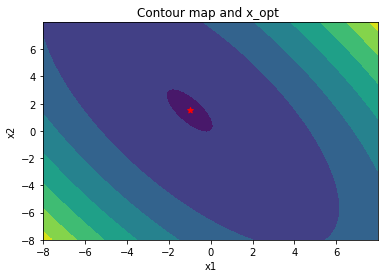

In [71]:
Q = np.array([[4,2],[2,2]])
b = np.array([[-1],[1]])
x0 = np.array([[1],[-1]])
H0 = np.eye(2)
tol = 0.5

x_opt = dfp_algorithm_debug(Q, b, x0, H0, tol)

delta = 0.025
X1 = np.arange(-8.0, 8.0, delta)
X2 = np.arange(-8.0, 8.0, delta)
x1, x2 = np.meshgrid(X1, X2)

f = 2*x1**2 + 2*x1*x2 + x2**2 + x1 -x2

plt.contourf(x1,x2,f)
plt.scatter(x_opt[0],x_opt[1], marker = '*', color = 'r')
plt.title("Contour map and x_opt ")
plt.xlabel('x1')
plt.ylabel('x2')